# Chapter 2 - Introduction to Time Series Modeling

Since the vast majority of financial data has a time dimension, time series modeling is a good approach to capture the characteristics of an event in a solid way

Formal Definition of time series:
- A time series is a set of observations $X_t$ each one being recorded at a specific time $t$.

In [20]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [24]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "CL=F"  # ou "BZ=F" ou "OIL"
start_date = "1980-01-01"
end_date   = "2020-01-01"

data = yf.download(ticker, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


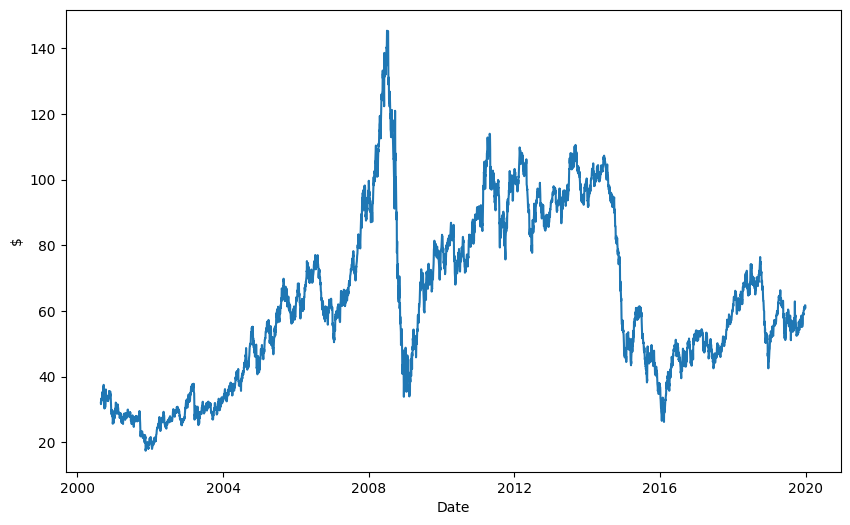

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(data.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

Quandl did not work (could not get the API key to work)

Time Series approach is superior since correlations of observations in time better explain the current value. Having data with a correlated structure in time implies a violation of the famous identically and independently distributed (IID) assumption

IID assumption enables us to model joint probability of data as the product of probability of observations. The process $X_t$ is said to be an IID with mean 0 and variance $\sigma^2$:

$$ X_t \approx IID (0,\sigma^2)$$

## Time Series Components

In [27]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ticker = "^GSPC" #SP500
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,1,1)
SP_prices = yf.download(ticker, start=start, end=end, interval = "1mo").Close

[*********************100%***********************]  1 of 1 completed


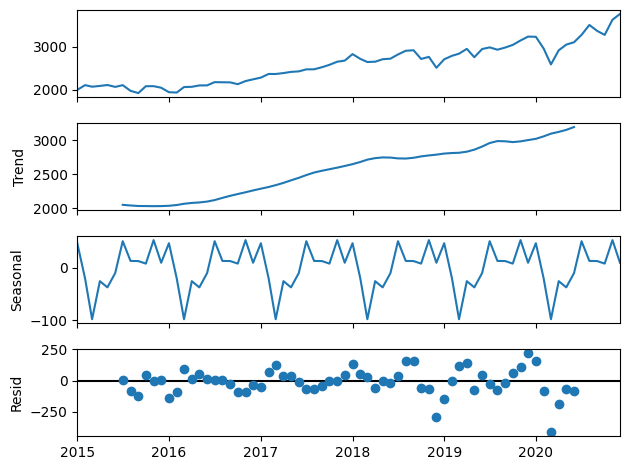

In [31]:
seasonal_decompose(SP_prices, period=12).plot()
plt.show()

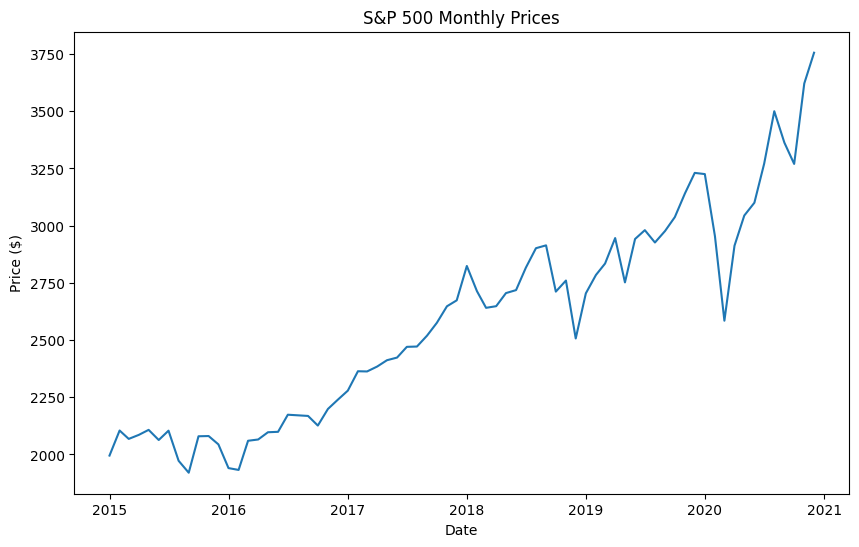

In [32]:
plt.figure(figsize=(10,6))
plt.plot(SP_prices)
plt.title("S&P 500 Monthly Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

We can see a clear trend (tendency of an increase)

### Autocorrelation function (ACF)

ACF is a statistical tool to analyze the relationship between the current value of a time series and its lagged values:

$$ \rho(h)=\frac{Cov(X_{t'}X_{t-h})}{Var(X_t)}$$

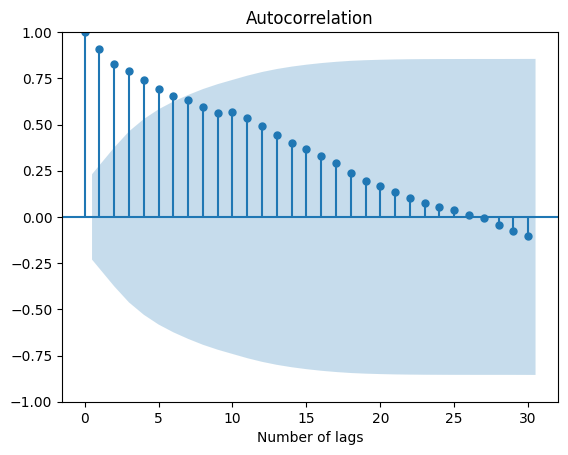

In [33]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel("Number of lags")
plt.show()

Sources of autocorrelation:

- The primary source of autocorrelation is carryover, the preceding observation has an impact on the current one

- Model misspecification

- Measurement error (difference between observed and actual value)

- Dropping a variable, which has an explanatory power

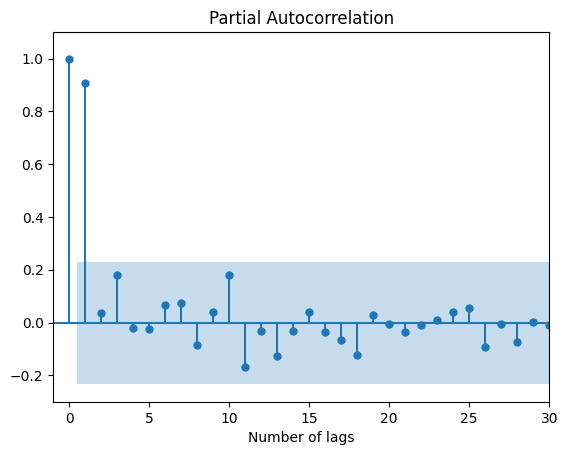

In [39]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel("Number of lags")
plt.xlim(-1,30)
plt.ylim(-0.3, 1.1)
plt.show()

### Seasonality

Exists if there are regular fluctuations over a giver period of time

### Residual

irregular component of time series. Equal to the difference between observations and related fitted values.